In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#get dataset
#make a copy and keep the original
path='D://chris/python_work/ML_Practice/house-prices-advanced-regression-techniques/train.csv'
df=pd.read_csv(path)
df_copy=df.copy()

In [3]:
#brief description
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#drop Id column
df_copy.drop('Id', axis=1, inplace=True)
#separate target from features
target=df_copy['SalePrice']
features=df_copy.drop('SalePrice', axis=1)

In [ ]:
#convert MSSubClass to categorical
df_copy['MSSubClass']=df_copy['MSSubClass'].astype('object')

In [4]:
#separate categorical and numerical
categorical_variables=df_copy.select_dtypes(include='object').columns.to_list()
numerical_variables=df_copy.select_dtypes(include=np.number).columns.to_list()

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [6]:
#summary stats for numeric columns
df_copy.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#summary stats for categorical columns
df_copy.describe(include='object')

In [7]:
#separate nominal, ordinal and binary categorical variables
nominal_variables=['MSZoning',
                     'MSSubClass',
                     'Alley',
                     'Neighborhood',
                     'LotConfig',
                     'Condition1',
                     'Condition2',
                     'BldgType',
                     'HouseStyle',
                     'RoofStyle',
                     'RoofMatl',
                     'Exterior1st',
                     'Exterior2nd',
                     'MasVnrType',
                     'Foundation',
                     'Heating',
                     'Electrical',
                     'Functional',
                     'GarageType',
                     'PavedDrive',
                     'MiscFeature',
                     'SaleType',
                     'SaleCondition']
binary_variables=['Street',
                   'CentralAir']
ordinal_variables=list(set(categorical_variables) - set(binary_variables) -set(nominal_variables))

In [ ]:
#binary variables
binary_variables

In [ ]:
#ordinal variables
ordinal_variables

In [ ]:
#nominal variables
nominal_variables

In [10]:
#number of ordinal variables
len(ordinal_variables)

19

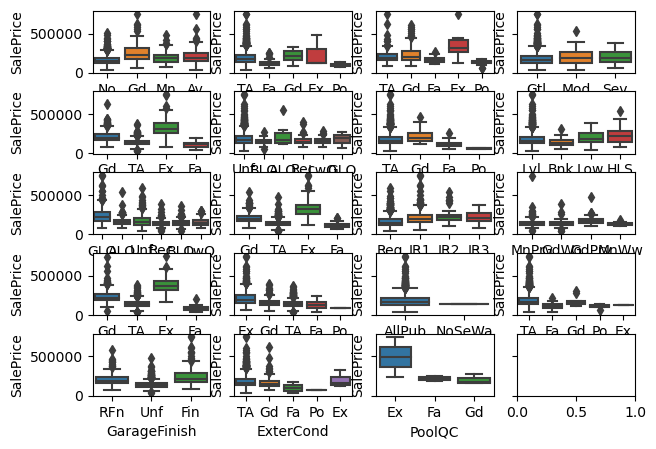

In [11]:
#box plots for ordinal variables
fig, axes=plt.subplots(5,4, figsize=(20,15), sharey=True)
plt.subplots_adjust(hspace=0.3)
i,j=(0,0)
for column in ordinal_categories:
    sns.boxplot(data=df_copy, x=column, y='SalePrice', ax=axes[i,j])
    if (j==3):
        i=i+1
        j=0
    else:
        j=j+1
    

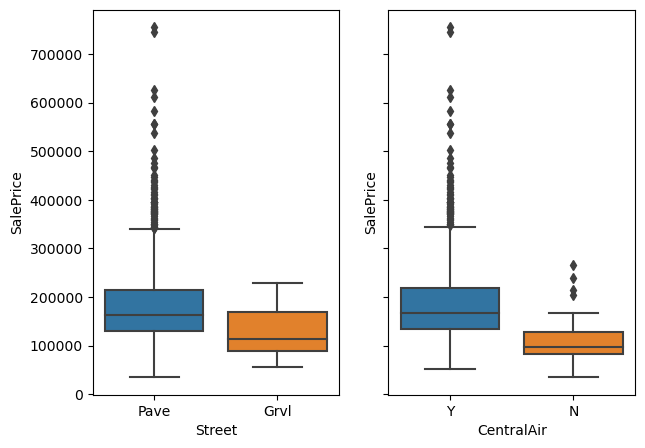

In [12]:
#box plots for binary variables
fig, axes=plt.subplots(1,2, figsize=(7,5), sharey=True)
i=0
for column in binary_categories:
    sns.boxplot(data=df_copy, x=column, y='SalePrice', ax=axes[i])
    i=i+1

In [ ]:
#number of nominal variables
len(nominal_variables)

In [ ]:
#box plots for nominal variables
fig, axes=plt.subplots(5,4, figsize=(20,15), sharey=True)
plt.subplots_adjust(hspace=0.3)
i,j=(0,0)
for column in nominal_variables:
    sns.boxplot(data=df_copy, x=column, y='SalePrice', ax=axes[i,j])
    if (j==3):
        i=i+1
        j=0
    else:
        j=j+1

In [ ]:
#number of variables with missing values
df_copy.isnull().

In [14]:
#list of variables with null values
list(df_copy.columns[df.isnull().any() == True])

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

* Alley null means no alley access
* BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2  null means No Basement
* FireplaceQu null means No Fireplace
* GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond null means No Garage
* PoolQC null means No Pool
* Fence null means No Fence
* MiscFeature null means No Miscellaneous feature

**True null values in Electrical, LotFrontage, MasVnrType, and MasVnrArea**

In [15]:
#top 20 rows for Electrical, LotFrontage, MasVnrType, and MasVnrArea
df_copy[['Electrical', 'LotFrontage', 'MasVnrType', 'MasVnrArea']].head(20)

,Electrical,LotFrontage,MasVnrType,MasVnrArea
0,SBrkr,65.0,BrkFace,196.0
1,SBrkr,80.0,None,0.0
2,SBrkr,68.0,BrkFace,162.0
3,SBrkr,60.0,None,0.0
4,SBrkr,84.0,BrkFace,350.0
5,SBrkr,85.0,None,0.0
6,SBrkr,75.0,Stone,186.0
7,SBrkr,NaN,Stone,240.0
8,FuseF,51.0,None,0.0
9,SBrkr,50.0,None,0.0


* No MasVnrType is represented by string None.
* The corresponding MasVnrArea is zero

In [16]:
#ratio of null to not null values for columns with true nulls
null_true_false=df_copy[['Electrical', 'LotFrontage', 'MasVnrType', 'MasVnrArea']].isnull()
for col in null_true_false.columns.to_list():
    print(null_true_false[col].value_counts(normalize=True))
    print(); print()

False    0.999315
True     0.000685
Name: Electrical, dtype: float64


False    0.822603
True     0.177397
Name: LotFrontage, dtype: float64


False    0.994521
True     0.005479
Name: MasVnrType, dtype: float64


False    0.994521
True     0.005479
Name: MasVnrArea, dtype: float64




In [17]:
#remove null records for MasVnrType and MasVnrArea
print(f'Before: {df_copy.shape}')
df_copy.dropna(subset=['MasVnrArea','MasVnrType'], inplace=True, axis=0)
print(f'After: {df_copy.shape}')

Before: (1460, 81)
After: (1452, 81)


In [18]:
#remove null values for Electrical
print(f'Before: {df_copy.shape}')
df_copy.dropna(subset=['Electrical'], inplace=True, axis=0)
print(f'After: {df_copy.shape}')

Before: (1452, 81)
After: (1451, 81)


In [19]:
#replace null values in LotFrontage with median
median=df_copy['LotFrontage'].median()
df_copy['LotFrontage'].fillna(median, inplace=True)

In [20]:
#checking if all null values have been handled
df_copy[['Electrical', 'LotFrontage', 'MasVnrType', 'MasVnrArea']].isnull().any()

Electrical     False
LotFrontage    False
MasVnrType     False
MasVnrArea     False
dtype: bool

In [21]:
#replace np.nan with 'NA' for columns MiscFeature, Fence, GarageType, 

In [22]:

['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [23]:
#top 50 rows for basement
df_copy[['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',]].head(50)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
0,Gd,TA,No,GLQ,Unf
1,Gd,TA,Gd,ALQ,Unf
2,Gd,TA,Mn,GLQ,Unf
3,TA,Gd,No,ALQ,Unf
4,Gd,TA,Av,GLQ,Unf
5,Gd,TA,No,GLQ,Unf
6,Ex,TA,Av,GLQ,Unf
7,Gd,TA,Mn,ALQ,BLQ
8,TA,TA,No,Unf,Unf
9,TA,TA,No,GLQ,Unf


In [24]:
#where no basement, replace basement values with 'NA'
#handling null values for Bsmt
Bsmt=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for col in Bsmt:
    df_copy[col].fillna('NA', inplace=True)

In [25]:
#confirm changes
df_copy[Bsmt].isnull().any()

BsmtQual        False
BsmtCond        False
BsmtExposure    False
BsmtFinType1    False
BsmtFinType2    False
dtype: bool

In [26]:
#top 50 rows for garage
df_copy[['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']].head(50)

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,Attchd,2003.0,RFn,TA,TA
1,Attchd,1976.0,RFn,TA,TA
2,Attchd,2001.0,RFn,TA,TA
3,Detchd,1998.0,Unf,TA,TA
4,Attchd,2000.0,RFn,TA,TA
5,Attchd,1993.0,Unf,TA,TA
6,Attchd,2004.0,RFn,TA,TA
7,Attchd,1973.0,RFn,TA,TA
8,Detchd,1931.0,Unf,Fa,TA
9,Attchd,1939.0,RFn,Gd,TA


In [27]:
#where no garage, replace basement values with 'NA' exept for GarageYrBlt
#handle missing values for garage
Garage=['GarageType','GarageFinish','GarageQual','GarageCond']
for col in Garage:
    df_copy[col].fillna('NA', inplace=True)

In [28]:
#top 50 rows for garage
df_copy[['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']].head(50)

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,Attchd,2003.0,RFn,TA,TA
1,Attchd,1976.0,RFn,TA,TA
2,Attchd,2001.0,RFn,TA,TA
3,Detchd,1998.0,Unf,TA,TA
4,Attchd,2000.0,RFn,TA,TA
5,Attchd,1993.0,Unf,TA,TA
6,Attchd,2004.0,RFn,TA,TA
7,Attchd,1973.0,RFn,TA,TA
8,Detchd,1931.0,Unf,Fa,TA
9,Attchd,1939.0,RFn,Gd,TA


In [29]:
#replace np.nan with 'NA' in the remaining null columns
#handling emaining missing values
others=['Alley','PoolQC','Fence','MiscFeature','FireplaceQu']
print(f'Before:\n{df_copy[others].isnull().any()}')
print(); print()
for col in others:
    df[col].fillna('NA', inplace=True)
print(f'After:\n{df_copy[others].isnull().any()}')

Before:
Alley          True
PoolQC         True
Fence          True
MiscFeature    True
FireplaceQu    True
dtype: bool
After:
Alley          False
PoolQC         False
Fence          False
MiscFeature    False
FireplaceQu    False
dtype: bool


In [30]:
#numerical variables arranged from highest skewness to lowest skewness
numeric_skew=df[numerical_columns].skew().sort_values(ascending=False)
numeric_skew

MiscVal          24.401513
PoolArea         14.782069
LotArea          12.235742
3SsnPorch        10.271742
LowQualFinSF      8.982567
KitchenAbvGr      4.512817
BsmtFinSF2        4.240230
ScreenPorch       4.107411
BsmtHalfBath      4.088583
EnclosedPorch     3.094001
MasVnrArea        2.668016
LotFrontage       2.419466
OpenPorchSF       2.384908
SalePrice         1.883111
BsmtFinSF1        1.702582
WoodDeckSF        1.541872
TotalBsmtSF       1.535566
MSSubClass        1.408299
GrLivArea         1.373512
1stFlrSF          1.373142
BsmtUnfSF         0.919977
2ndFlrSF          0.815766
OverallCond       0.693905
HalfBath          0.685128
TotRmsAbvGrd      0.680863
Fireplaces        0.647744
BsmtFullBath      0.604189
BedroomAbvGr      0.217847
OverallQual       0.213405
MoSold            0.209257
GarageArea        0.182585
YrSold            0.096132
FullBath          0.037756
Id                0.003576
GarageCars       -0.337419
YearRemodAdd     -0.496339
YearBuilt        -0.608221
G

In [31]:
#list of highly skewed numerical variables
skew_high=numeric_skew.loc[(numeric_skew>=1) | (numeric_skew<=-1)].index.to_list()
skew_high

['MiscVal',
 'PoolArea',
 'LotArea',
 '3SsnPorch',
 'LowQualFinSF',
 'KitchenAbvGr',
 'BsmtFinSF2',
 'ScreenPorch',
 'BsmtHalfBath',
 'EnclosedPorch',
 'MasVnrArea',
 'LotFrontage',
 'OpenPorchSF',
 'SalePrice',
 'BsmtFinSF1',
 'WoodDeckSF',
 'TotalBsmtSF',
 'MSSubClass',
 'GrLivArea',
 '1stFlrSF']

In [32]:
#number of highly skewed variables
len(skew_high)

20

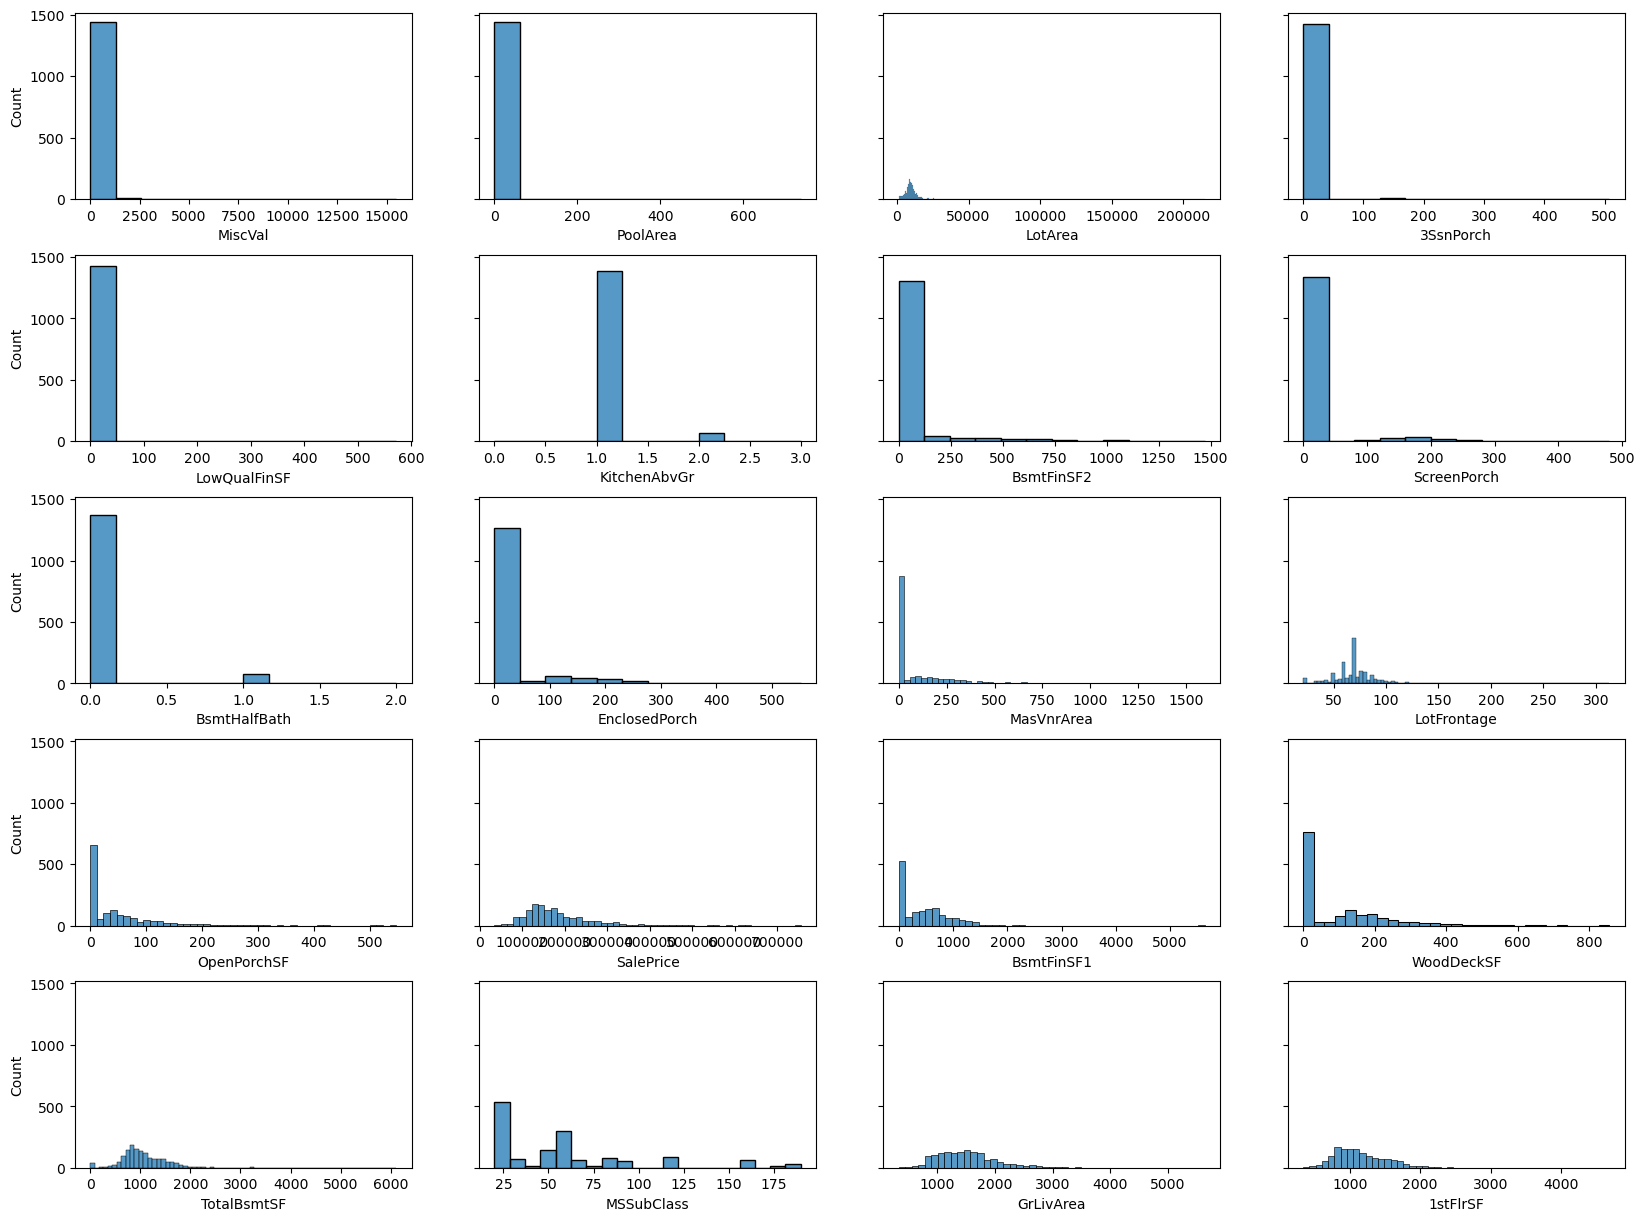

In [33]:
#distibution for highly skewed variables
fig, axes=plt.subplots(5,4,figsize=(20,15), sharey=True)
plt.subplots_adjust(hspace=0.3)
i,j=(0,0)
for col in skew_high:
    sns.histplot(x=col, data=df_copy, ax=axes[i,j])
    if (j==3):
        j=0
        i=i+1
    else:
        j=j+1

In [34]:
#list of moderately skewed numerical variables
skew_norm=numeric_skew.loc[(numeric_skew<1)&(numeric_skew>-1)].index.to_list()
skew_norm

['BsmtUnfSF',
 '2ndFlrSF',
 'OverallCond',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'BsmtFullBath',
 'BedroomAbvGr',
 'OverallQual',
 'MoSold',
 'GarageArea',
 'YrSold',
 'FullBath',
 'Id',
 'GarageCars',
 'YearRemodAdd',
 'YearBuilt',
 'GarageYrBlt']

In [35]:
#number of moderately skewed and low skewed numerical variables
len(skew_norm)

18

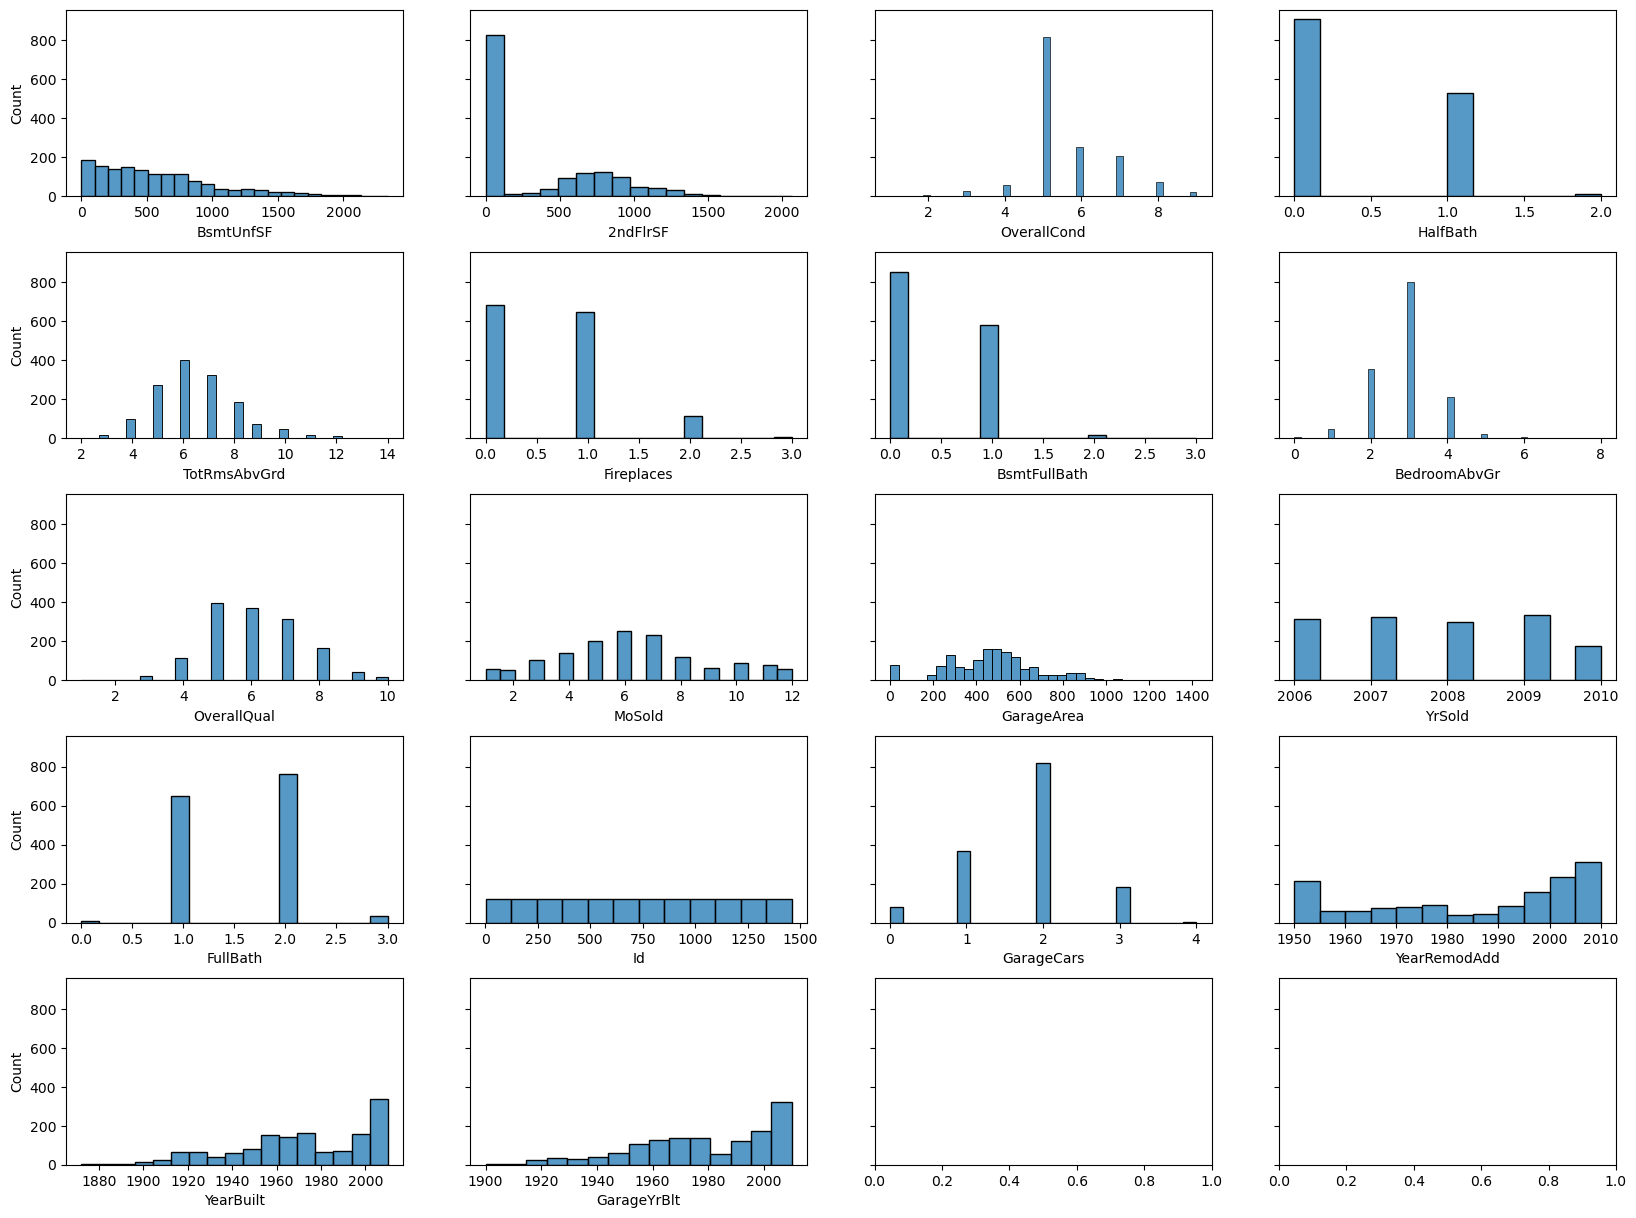

In [36]:
#distribution for moderately skewed and low skewed numerical variables
fig, axes=plt.subplots(5,4,figsize=(20,15), sharey=True)
plt.subplots_adjust(hspace=0.3)
i,j=(0,0)
for col in skew_norm:
    sns.histplot(x=col, data=df_copy, ax=axes[i,j])
    if (j==3):
        j=0
        i=i+1
    else:
        j=j+1

In [38]:
#number of numeric columns
len(numerical_columns)

38

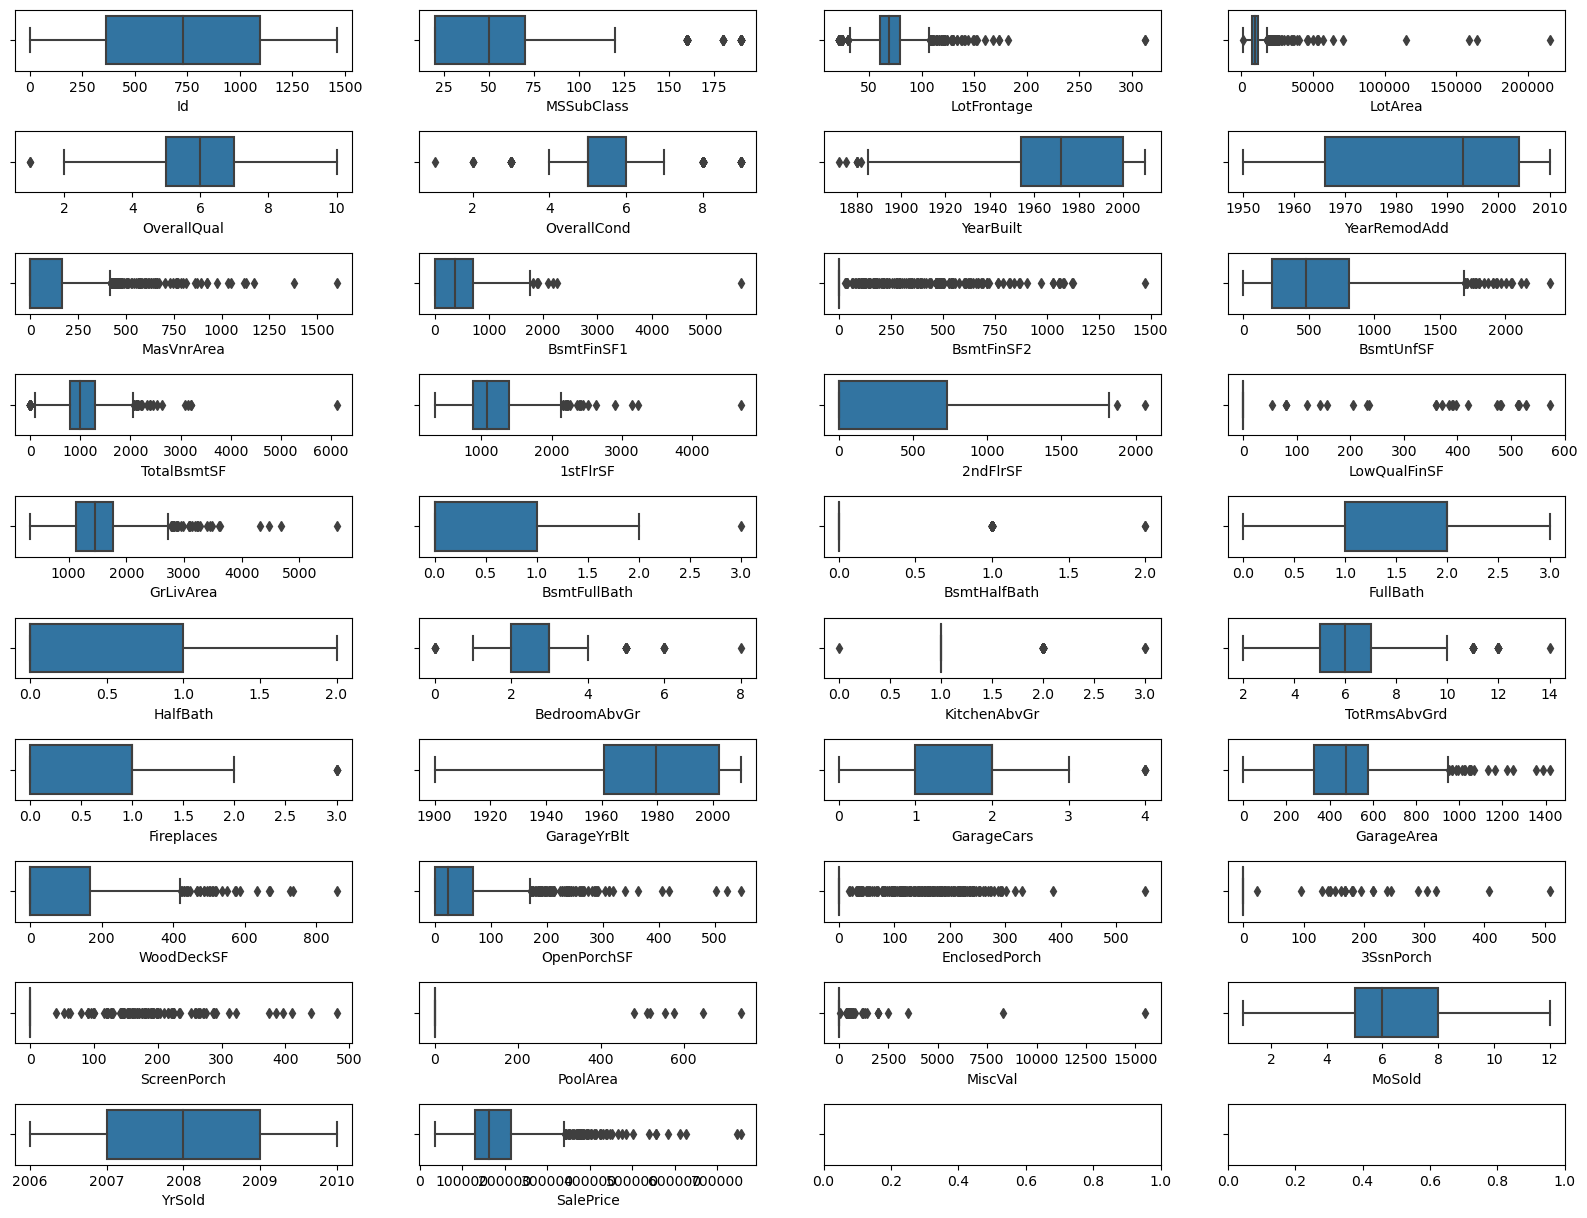

In [41]:
#box plots for each numeric variable
fig, axes=plt.subplots(10,4,figsize=(20,15), sharey=True)
plt.subplots_adjust(hspace=1.0)
i,j=(0,0)
for col in numerical_columns:
    sns.boxplot(x=col, data=df_copy, ax=axes[i,j])
    if (j==3):
        j=0
        i=i+1
    else:
        j=j+1

In [42]:
#summary stats for highly skewed numeric variables
df_copy[skew_high].describe()

,MiscVal,PoolArea,LotArea,3SsnPorch,LowQualFinSF,KitchenAbvGr,BsmtFinSF2,ScreenPorch,BsmtHalfBath,EnclosedPorch,MasVnrArea,LotFrontage,OpenPorchSF,SalePrice,BsmtFinSF1,WoodDeckSF,TotalBsmtSF,MSSubClass,GrLivArea,1stFlrSF
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,43.758787,2.776017,10507.808408,3.430737,5.880772,1.046175,46.838043,15.154376,0.057891,21.952447,103.75672,69.845624,46.422467,180624.101999,442.274983,94.412819,1056.310131,56.933150,1514.174363,1161.551344
std,497.648467,40.301212,9992.987081,29.406940,48.771560,0.219571,161.777324,55.917522,0.239449,61.108223,181.10815,22.044429,66.060150,79312.128273,455.369276,125.436852,437.914609,42.350366,525.799521,385.002532
min,0.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,21.000000,0.000000,34900.000000,0.000000,0.000000,0.000000,20.000000,334.000000,334.000000
25%,0.000000,0.000000,7537.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,60.000000,0.000000,129900.000000,0.000000,0.000000,795.000000,20.000000,1128.000000,882.000000
50%,0.000000,0.000000,9477.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,69.000000,24.000000,162500.000000,381.000000,0.000000,991.000000,50.000000,1464.000000,1086.000000
75%,0.000000,0.000000,11600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,166.00000,79.000000,68.000000,214000.000000,707.000000,168.000000,1297.500000,70.000000,1776.000000,1391.000000
max,15500.000000,738.000000,215245.000000,508.000000,572.000000,3.000000,1474.000000,480.000000,2.000000,552.000000,1600.00000,313.000000,547.000000,755000.000000,5644.000000,857.000000,6110.000000,190.000000,5642.000000,4692.000000


In [47]:
#clipping feature numerical data
columns_to_transform=pd.Index(numerical_columns).drop(['SalePrice']).to_list()
columns_to_transform

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [62]:
#clipping outliers to upper or lower limits
for col in columns_to_transform:
    q1=np.quantile(df_copy[col], 0.25)
    q3=np.quantile(df_copy[col], 0.75)
    iqr=q3-q1
    upper_bound=q3+(1.5*iqr)
    lower_bound=q1-(1.5*iqr)
    df_copy[col]=(np.where((df_copy[col]<=upper_bound), np.where((df_copy[col]>=lower_bound), df_copy[col], lower_bound), upper_bound))

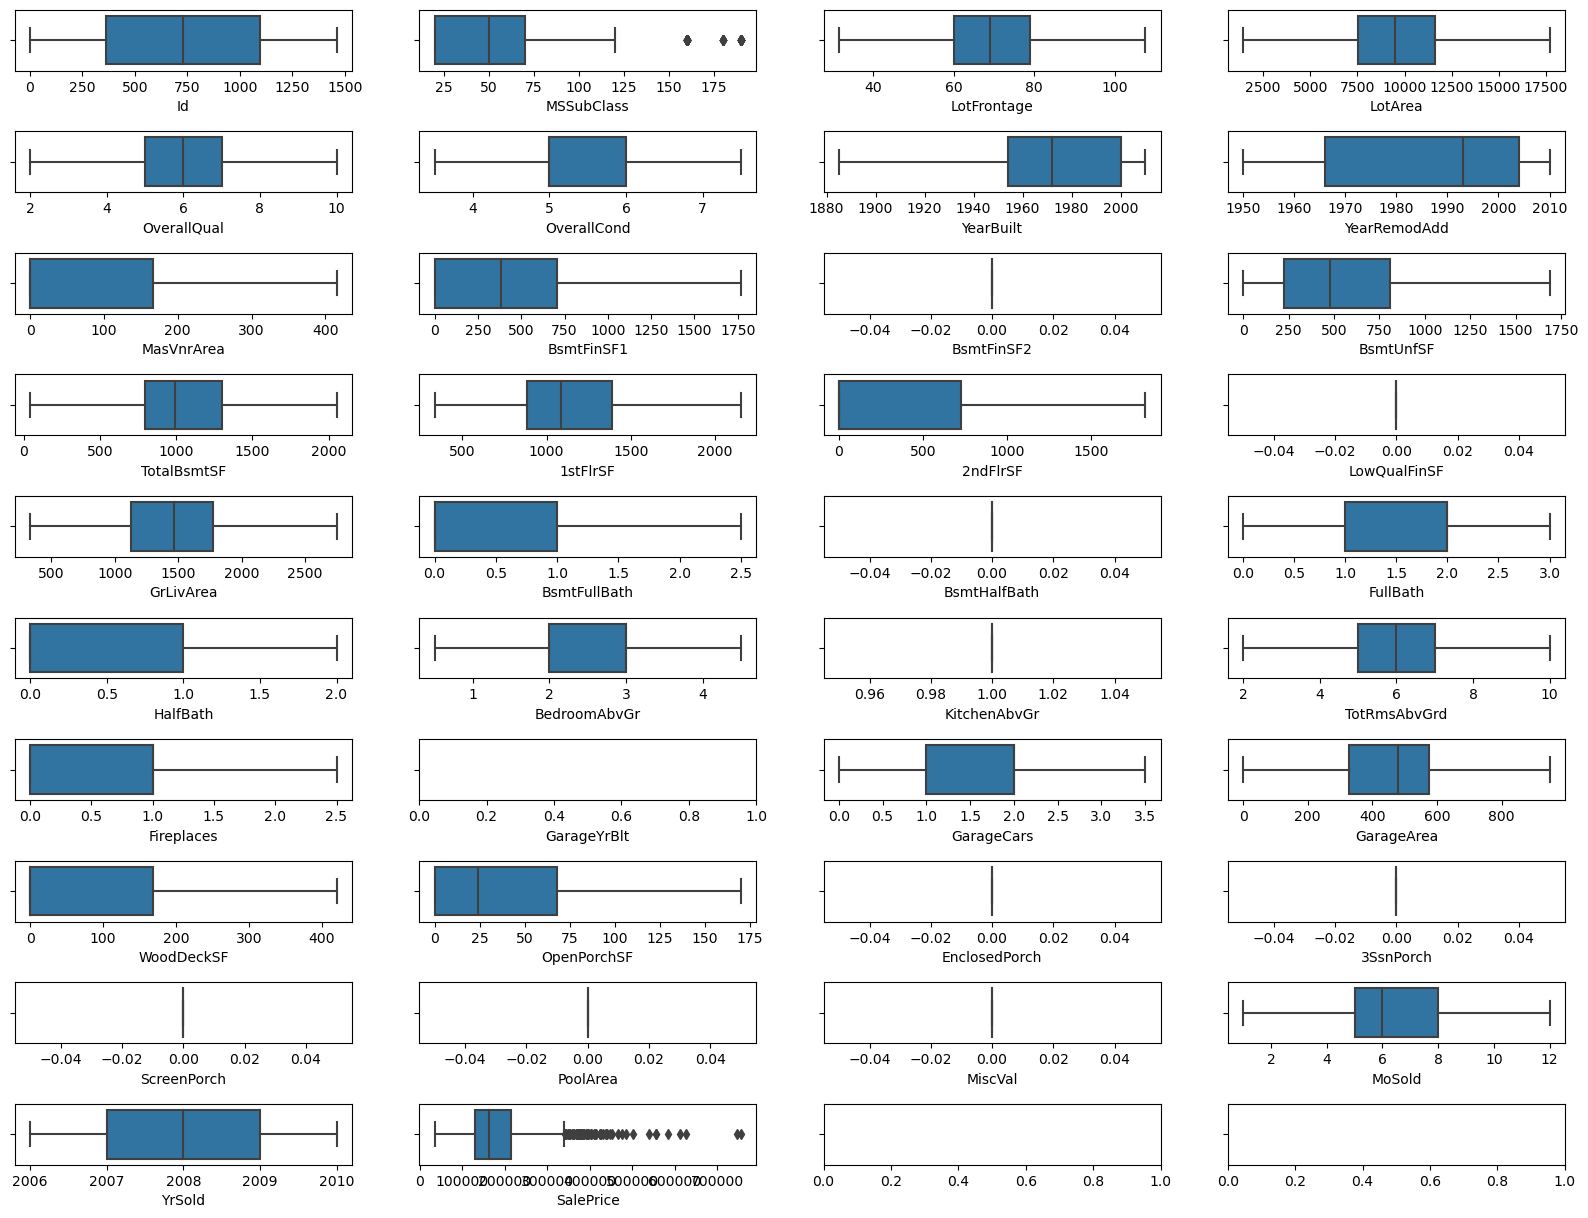

In [63]:
#box plots for each numeric variable after clipping
fig, axes=plt.subplots(10,4,figsize=(20,15), sharey=True)
plt.subplots_adjust(hspace=1.0)
i,j=(0,0)
for col in numerical_columns:
    sns.boxplot(x=col, data=df_copy, ax=axes[i,j])
    if (j==3):
        j=0
        i=i+1
    else:
        j=j+1

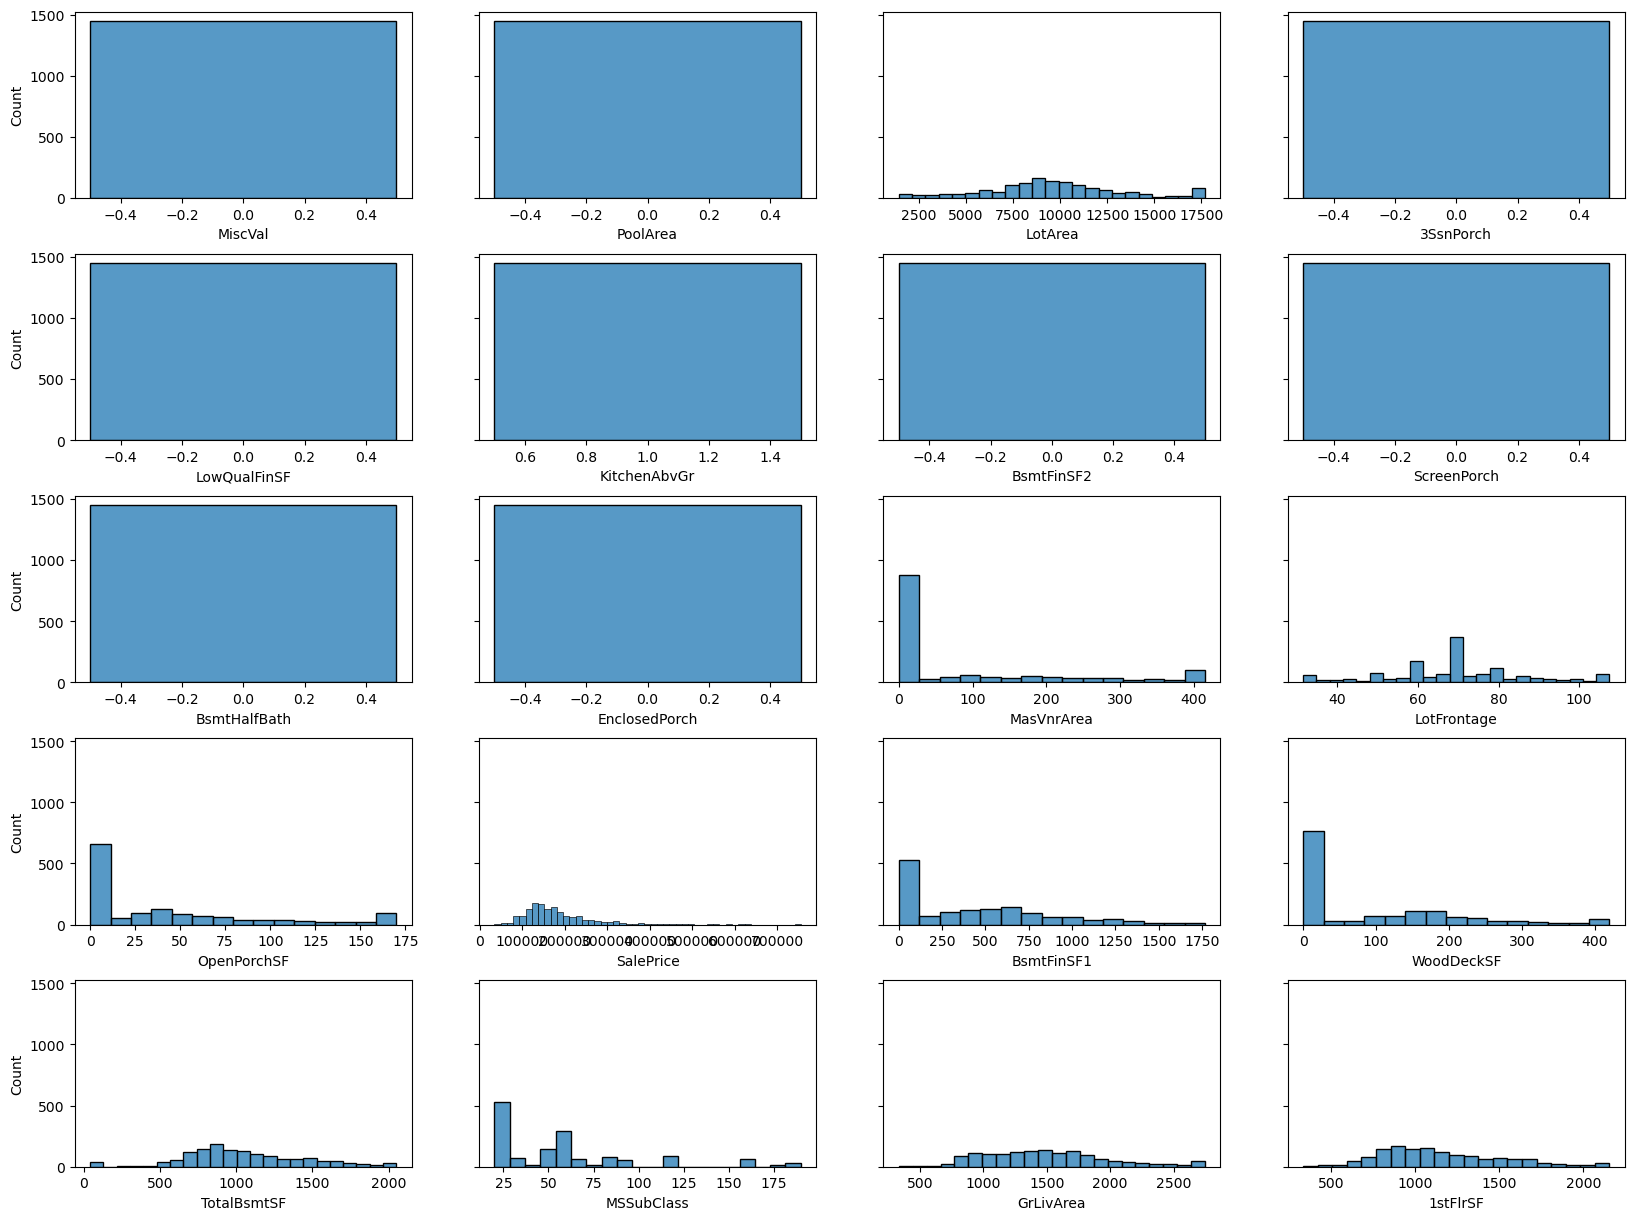

In [64]:
#distibution for highly skewed variables after clipping
fig, axes=plt.subplots(5,4,figsize=(20,15), sharey=True)
plt.subplots_adjust(hspace=0.3)
i,j=(0,0)
for col in skew_high:
    sns.histplot(x=col, data=df_copy, ax=axes[i,j])
    if (j==3):
        j=0
        i=i+1
    else:
        j=j+1

In [65]:
#skew values for highly skewed variables after clipping
df_copy[skew_high].skew().sort_values(ascending=False)

SalePrice        1.883111
MSSubClass       1.408299
MasVnrArea       1.289529
OpenPorchSF      1.142184
WoodDeckSF       1.082888
BsmtFinSF1       0.743549
1stFlrSF         0.656663
GrLivArea        0.597056
TotalBsmtSF      0.229244
LotArea          0.209388
LotFrontage      0.094854
ScreenPorch      0.000000
BsmtHalfBath     0.000000
EnclosedPorch    0.000000
PoolArea         0.000000
BsmtFinSF2       0.000000
KitchenAbvGr     0.000000
LowQualFinSF     0.000000
3SsnPorch        0.000000
MiscVal          0.000000
dtype: float64